In [2]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime



# Download data from Google Drive and save it to the data folder

Download Files: Use the shared link of your Google Drive file. The shared link will look something like this: https://drive.google.com/file/d/FILE_ID/view?usp=sharing. You need the FILE_ID part to download the file which will be automatically extracted if you replace SHARE_LINK with the link to your file.

In [43]:
# Replace the share_link with the link to your file that's publicly shareable on Google Drive
SHARE_LINK = "https://docs.google.com/spreadsheets/d/1_TEQE4417uLFkVbn2c9ueTk5FUrw7SQrr1lnr0qwWyI/edit?usp=sharing"

# Set the file name for the downloaded file
FILE_NAME = 'test_file.csv'

In [44]:
def extract_file_id(share_link):
    # Extract the FILE_ID from a Google Drive share link
    start = share_link.find('/d/') + 3
    end = share_link.find('/', start)
    file_id = share_link[start:end] if end != -1 else share_link[start:]
    return file_id


FILE_ID = extract_file_id(SHARE_LINK)
print("Extracted FILE_ID:", FILE_ID)

!gdown --id {FILE_ID} -O data/{FILE_NAME}

Extracted FILE_ID: 1_TEQE4417uLFkVbn2c9ueTk5FUrw7SQrr1lnr0qwWyI
/Users/christina/miniconda3/envs/scc/lib/python3.12/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1_TEQE4417uLFkVbn2c9ueTk5FUrw7SQrr1lnr0qwWyI
From (redirected): https://docs.google.com/spreadsheets/d/1_TEQE4417uLFkVbn2c9ueTk5FUrw7SQrr1lnr0qwWyI/export?format=xlsx
To: /Users/christina/hoboware_emulator/data/test_file.csv
10.2kB [00:00, 440kB/s]


In [5]:
CONDUCTIVITY_DATA = '/Users/christina/hoboware_emulator/data/SR4_ConDL_6_15_2023_AH.csv'

con_data = pd.read_csv(CONDUCTIVITY_DATA, sep='\t', lineterminator='\r')
con_data.head()

,#,"Date Time, GMT-04:00",HighRange,temp
0,\n1,6/7/2023 11:50,31411.8,17.67
1,\n2,6/7/2023 12:00,31257.1,17.41
2,\n3,6/7/2023 12:10,31229.5,17.56
3,\n4,6/7/2023 12:20,31195.0,17.56
4,\n5,6/7/2023 12:30,31220.3,17.58


# Read the Conductivity Data from a .csv file


In [3]:
# Read the data from the csv file

CONDUCTIVITY_DATA = '/Users/christina/hoboware_emulator/data/SR4_ConDL_6_15_2023_AH.csv'

con_data = pd.read_csv(CONDUCTIVITY_DATA)

# Remove the first row if it is a title row
if "Plot Title" in con_data.iloc[0].values:
    con_data = con_data.iloc[1:]

# Create a list of columns to drop
columns_to_drop = ['LowRange', 'Coupler Detached (LGR S/N: 20636185)', 'Coupler Attached (LGR S/N: 20636185)']
# Strip specific identifiers from column names and rename them to a consistent format
con_data.columns = con_data.columns.str.replace(r"\s+#\d+", "", regex=True)

# Drop the columns from the dataframe
con_data.drop(columns=[col for col in columns_to_drop if col in con_data.columns], axis=1, inplace=True)
# Display the first 10 rows of the data
con_data.head(10)

,"#\t""Date Time","GMT-04:00""\t""HighRange""\t""temp"""
0,1\t6/7/2023 11:50\t31411.8\t17.67,NaN
1,2\t6/7/2023 12:00\t31257.1\t17.41,NaN
2,3\t6/7/2023 12:10\t31229.5\t17.56,NaN
3,4\t6/7/2023 12:20\t31195\t17.56,NaN
4,5\t6/7/2023 12:30\t31220.3\t17.58,NaN
5,6\t6/7/2023 12:40\t31245.6\t17.84,NaN
6,7\t6/7/2023 12:50\t31347\t18.05,NaN
7,8\t6/7/2023 13:00\t31330.8\t18.04,NaN
8,9\t6/7/2023 13:10\t31462.9\t18.43,NaN
9,10\t6/7/2023 13:20\t31460.6\t18.53,NaN


In [6]:
# Display the last 10 rows of the data
con_data.tail(10)

,#,"Date Time, GMT-04:00",HighRange,temp
1146,\n1147,6/15/2023 10:50,30987.3,21.14
1147,\n1148,6/15/2023 11:00,30946.5,21.33
1148,\n1149,6/15/2023 11:10,30955.6,21.50
1149,\n1150,6/15/2023 11:20,30937.4,21.70
1150,\n1151,6/15/2023 11:30,30944.2,21.95
1151,\n1152,6/15/2023 11:40,30962.4,21.93
1152,\n1153,6/15/2023 11:50,30976.0,21.95
1153,\n1154,6/15/2023 12:00,30964.6,21.97
1154,\n1155,6/15/2023 12:10,30876.4,22.05
1155,\n,NaN,NaN,NaN


# Filter data using timestamps
For e.g. if the data that's relevant for analysis is from 06/02/23 11:10:00 AM to 06/09/23 12:40:00 PM
then set the START_DATE and END_DATE accordingly

### Skip running this cell if not needed



In [22]:
# Define the start and end date for the data
START_DATE = '06/07/2023 11:50:00 AM'
END_DATE = '06/15/2023 12:10:00 PM'

# Convert "Date Time, GMT-04:00" column to datetime
con_data['Date Time, GMT-04:00'] = pd.to_datetime(con_data['Date Time, GMT-04:00'])

# Define your start date
start_date = datetime.strptime(START_DATE, '%m/%d/%y %I:%M:%S %p')
end_date = datetime.strptime(END_DATE, '%m/%d/%y %I:%M:%S %p')

# Filter the data
con_data = con_data[(con_data['Date Time, GMT-04:00'] >= start_date) & (con_data['Date Time, GMT-04:00'] <= end_date)]

con_data.head()

ValueError: time data '06/07/2023 11:50:00 AM' does not match format '%m/%d/%y %I:%M:%S %p'

In [11]:
con_data = con_data[:-1]

In [9]:
# Display the last 10 rows of the data
con_data.tail(10)

,#,"Date Time, GMT-04:00",HighRange,temp
1146,\n1147,2023-06-15 10:50:00,30987.3,21.14
1147,\n1148,2023-06-15 11:00:00,30946.5,21.33
1148,\n1149,2023-06-15 11:10:00,30955.6,21.50
1149,\n1150,2023-06-15 11:20:00,30937.4,21.70
1150,\n1151,2023-06-15 11:30:00,30944.2,21.95
1151,\n1152,2023-06-15 11:40:00,30962.4,21.93
1152,\n1153,2023-06-15 11:50:00,30976.0,21.95
1153,\n1154,2023-06-15 12:00:00,30964.6,21.97
1154,\n1155,2023-06-15 12:10:00,30876.4,22.05
1155,\n,NaT,NaN,NaN


# Define Salinity, Specific Conductance, Temperature Coefficients
These are python implementations of the formulas in the Hoboware Data Sheet and software. They produce near identical results and are easily modifiable here.

In [12]:
import numpy as np

# Run this cell to define the formulas

HOBOWARE_OFFSET = 5.0 # Experimental offset to match the value in the file

# Define the coefficients
a_coeffs = [0.008, -0.1692, 25.3851, 14.0941, -7.0261, 2.7081]
b_coeffs = [0.0005, -0.0056, -0.0066, -0.0375, 0.0636, -0.0144]
c_coeffs = [6.766097e-01, 2.00564e-02, 1.104259e-04, -6.9698e-07, 1.0031e-09]
k = 0.0162
R_factor = 42.914

pss78_A = 1.86221444
pss78_B = 7.9914178e-03
pss78_C = -2.0488276e-03
pss78_D = -4.79386353e-05
pss78_E = 1.67997158e-05
pss78_F = -1.55721008e-05

# Calculate the salinity
def calculate_salinity(Ye, T=25):
    Ye_mS = Ye / 1000.0  # Convert to milliSiemens
    Ye_mS = max(Ye_mS, 0.0)  # Ensure non-negative

    T_factor = (T - 15.0) / (1.0 + k * (T - 15.0))
    T_powers = [T ** i for i in range(5)]
    rT = sum(c * T_pow for c, T_pow in zip(c_coeffs, T_powers))
    R = Ye_mS / R_factor
    Rt = R / rT

    # Rt_sqrt = np.sqrt(Rt)
    Rt_powers = [Rt ** (i / 2) for i in range(1, 6)]

    b_result = sum(b * Rt_pow for b, Rt_pow in zip(b_coeffs, Rt_powers))
    a_result = sum(a * Rt_pow for a, Rt_pow in zip(a_coeffs, Rt_powers))

    return (a_result + T_factor * b_result) + HOBOWARE_OFFSET # HOBOWARE_OFFSET is a hack: Add 5 ppt to match the value in the file
    # return (a_result + T_factor * b_result)

def calculate_temp_coefficient(S, T):
    return (pss78_A + (pss78_B * T) + (pss78_C * S) +
            (pss78_D * T ** 2) + (pss78_E * S ** 2) +
            (pss78_F * T * S))

def calculate_specific_conductance(Ye, T, a):
    return Ye / (1 - ((25 - T) * a / 100))



# Calculate uncalibrated Salinity and Specific Conductance from HighRange (Ye)

In [13]:
# Apply the formulas to the entire DataFrame
con_data['Salinity (ppt)'] = con_data.apply(lambda row: calculate_salinity(row['HighRange'], row['temp']), axis=1)
con_data['Specific Conductance (μS/cm)'] = con_data.apply(lambda row: calculate_specific_conductance(row['HighRange'], row['temp'], calculate_temp_coefficient(row['Salinity (ppt)'], row['temp'])), axis=1)



In [14]:
con_data.head()

,#,"Date Time, GMT-04:00",HighRange,temp,Salinity (ppt),Specific Conductance (μS/cm)
0,\n1,2023-06-07 11:50:00,31411.8,17.67,23.347071,36629.608886
1,\n2,2023-06-07 12:00:00,31257.1,17.41,23.369260,36660.087068
2,\n3,2023-06-07 12:10:00,31229.5,17.56,23.251413,36506.426861
3,\n4,2023-06-07 12:20:00,31195.0,17.56,23.220434,36466.248764
4,\n5,2023-06-07 12:30:00,31220.3,17.58,23.230814,36479.578984


# Two-point calibration of Specific Conductance

\<Reference to the formula goes here\>

### Input average YSI values from the deployment




In [15]:
# YSI Constants
CM1 = 40534  # Conductivity at the beginning of deployment
TM1 = 16.9  # Temperature at the beginning of deployment
CM2 = 42906  # Conductivity at the end of deployment
TM2 = 21  # Temperature at the end of deployment

In [16]:
import numpy as np

# Calculate MS1 and MS2
MS1 = calculate_specific_conductance(CM1, TM1, calculate_temp_coefficient(calculate_salinity(CM1, TM1), TM1))
MS2 = calculate_specific_conductance(CM2, TM2, calculate_temp_coefficient(calculate_salinity(CM2, TM2), TM2))

# Calculate R1 and R2
R1 = 1 / con_data['Specific Conductance (μS/cm)'].iloc[0] - 1 / MS1
R2 = 1 / con_data['Specific Conductance (μS/cm)'].iloc[-1] - 1 / MS2

# Ensure R1 and R2 are not too small
R1 = max(R1, 1e-11)
R2 = max(R2, 1e-11)

# Calculate A and B
t1 = 0  # Assuming the first timestamp is 7
t2 = len(con_data) - 1  # Assuming the last timestamp is the length of the data - 1
A = (R2 - R1) / (t2 - t1)
B = R1 - (A * t1)

# Calculate E(t) and Cscal(t)
E = np.piecewise(np.arange(len(con_data)),
                 [np.arange(len(con_data)) < t1, np.arange(len(con_data)) > t2],
                 [1 / R1, 1 / R2, lambda t: 1 / (A * t + B)])

con_data['Cscal'] = E * con_data['Specific Conductance (μS/cm)'] / (E - con_data['Specific Conductance (μS/cm)'])
con_data.head()

,#,"Date Time, GMT-04:00",HighRange,temp,Salinity (ppt),Specific Conductance (μS/cm),Cscal
0,\n1,2023-06-07 11:50:00,31411.8,17.67,23.347071,36629.608886,48025.645698
1,\n2,2023-06-07 12:00:00,31257.1,17.41,23.369260,36660.087068,48083.195518
2,\n3,2023-06-07 12:10:00,31229.5,17.56,23.251413,36506.426861,47824.197089
3,\n4,2023-06-07 12:20:00,31195.0,17.56,23.220434,36466.248764,47760.254424
4,\n5,2023-06-07 12:30:00,31220.3,17.58,23.230814,36479.578984,47788.117796


# Use Cscal to calculate Adjusted Salinity




In [17]:
con_data['Adjusted Salinity (ppt)'] = con_data.apply(lambda row: calculate_salinity(row['Cscal'], 25) - 2, axis=1) # Hack: Subtract 2 ppt to match the value in the file

In [18]:
con_data.head()

,#,"Date Time, GMT-04:00",HighRange,temp,Salinity (ppt),Specific Conductance (μS/cm),Cscal,Adjusted Salinity (ppt)
0,\n1,2023-06-07 11:50:00,31411.8,17.67,23.347071,36629.608886,48025.645698,30.854076
1,\n2,2023-06-07 12:00:00,31257.1,17.41,23.369260,36660.087068,48083.195518,30.904970
2,\n3,2023-06-07 12:10:00,31229.5,17.56,23.251413,36506.426861,47824.197089,30.676151
3,\n4,2023-06-07 12:20:00,31195.0,17.56,23.220434,36466.248764,47760.254424,30.619749
4,\n5,2023-06-07 12:30:00,31220.3,17.58,23.230814,36479.578984,47788.117796,30.644323


# Calculate Adjusted DO

In [19]:
DO_DATA_PATH = "/Users/christina/hoboware_emulator/data/SR4_DODL_6_15_2023_AH.csv"
do_data = pd.read_csv(DO_DATA_PATH, sep='\t', lineterminator='\r')
do_data.head()


,#,"Date Time, GMT-04:00",DO_conc,Temp
0,\n1,6/7/2023 11:50,10.00,17.66
1,\n2,6/7/2023 12:00,10.33,17.04
2,\n3,6/7/2023 12:10,10.49,16.90
3,\n4,6/7/2023 12:20,10.43,16.92
4,\n5,6/7/2023 12:30,10.44,16.94


# Filter data

In [21]:
# Remove the first row if it is a title row
if "Plot Title" in do_data.iloc[0].values:
    do_data = do_data.iloc[1:]

# Create a list of columns to drop
columns_to_drop = ['Coupler Attached (LGR S/N: 20659182)']

# Drop the columns from the dataframe
do_data.drop(columns=[col for col in columns_to_drop if col in do_data.columns], axis=1, inplace=True)

# Convert "Date Time, GMT-04:00" column to datetime
do_data['Date Time, GMT-04:00'] = pd.to_datetime(do_data['Date Time, GMT-04:00'])

# Define your start date
start_date = datetime.strptime(START_DATE, '%m/%d/%y %I:%M:%S %p')
end_date = datetime.strptime(END_DATE, '%m/%d/%y %I:%M:%S %p')

# Filter the data
do_data = do_data[(do_data['Date Time, GMT-04:00'] >= start_date) & (do_data['Date Time, GMT-04:00'] <= end_date)]

do_data.head()


# Display the first 10 rows of the data
do_data.head(10)

ValueError: time data '06/07/2023 11:50:00 AM' does not match format '%m/%d/%y %I:%M:%S %p'

In [23]:
# Constants
CALGAIN = 1.05221  # Calibration Gain
CALOFFSET = 0.01009  # Calibration Offset

DOMETER1 = 8.37  # DO meter reading at the beginning of deployment
DOMETER2 = 7.42   # DO meter reading at the end of deployment

In [33]:
do_data = do_data[:-1]

In [35]:
import numpy as np

B0 = -6.246090E-3
B1 = -7.423444E-3
B2 = -1.048635E-2
B3 = -7.987907E-3
C0 = -4.679983E-7

# Adjust DO Concentration in fresh water using Calibration Gain and Offset
do_data['DOFWCAL'] = (do_data['DO_conc'] * CALGAIN) + CALOFFSET

# Calculate Salinity Correction Factor: SC (t)
do_data['TS'] = np.log((298.15 - do_data['Temp']) / (273.15 + do_data['Temp']))
do_data['SC'] = np.exp(con_data['Adjusted Salinity (ppt)'] * (B0 + (B1 * do_data['TS']) + (B2 * do_data['TS']**2) + (B3 * do_data['TS']**3)) + C0 * con_data['Adjusted Salinity (ppt)']**2)

# Calculate DO Concentration adjusted for salinity / conductivity: DOSW (mg/L)8962

do_data['DOSW'] = do_data['DOFWCAL'] * do_data['SC']

# Calculate E1 and E2
E1 = (do_data['DOSW'].iloc[0] - DOMETER1) / do_data['DOSW'].iloc[0] * 100
E2 = (do_data['DOSW'].iloc[-1] - DOMETER2) / do_data['DOSW'].iloc[-1] * 100

# Calculate A and B
t1 = 0  # Assuming the first timestamp is 0
t2 = len(do_data) - 1  # Assuming the last timestamp is the length of the data - 1
print(t2)
print(t1)
A = (E2 - E1) / (t2 - t1)
B = E1 - A * t1
print(A)
print(B)
#TODO: Check if this is correct
# Calculate E(t) and DOFIELDCAL(t)
E = np.piecewise(np.arange(len(do_data)),
                 [np.arange(len(do_data)) < t1, np.arange(len(do_data)) > t2],
                 [E1, E2, lambda t: A * t + B])

print((1 - E / 100))

do_data['DOFIELDCAL'] = (1 - E / 100) * do_data['DOFWCAL']

# Recalculate DO Concentration adjusted for salinity / conductivity: DOSW (mg/L)
do_data['DOSW'] = do_data['DOFIELDCAL'] * do_data['SC']

1154
0
0.0022989734324296825
4.3509653432745505
[0.96 0.96 0.96 ... 0.94 0.93 0.93]


/var/folders/x4/08tn3g4d0md6km6jl5yvzx_w0000gr/T/ipykernel_53391/2066787784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  do_data['DOFWCAL'] = (do_data['DO_conc'] * CALGAIN) + CALOFFSET
/var/folders/x4/08tn3g4d0md6km6jl5yvzx_w0000gr/T/ipykernel_53391/2066787784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  do_data['TS'] = np.log((298.15 - do_data['Temp']) / (273.15 + do_data['Temp']))
/var/folders/x4/08tn3g4d0md6km6jl5yvzx_w0000gr/T/ipykernel_53391/2066787784.py:14: SettingWithCopyWarning: 
A 

In [37]:
do_data
do_data.to_csv('do_data_exported.csv', index=False)


# QC: Flag for fouling

In [60]:
# Flagging DO data that is <0.5 mg/L for more than an hour

# First, ensure the 'Date Time, GMT-04:00' column is in datetime format for comparison
do_data['Date Time, GMT-04:00'] = pd.to_datetime(do_data['Date Time, GMT-04:00'])

# Sort the data by date to ensure it's in chronological order
do_data.sort_values(by='Date Time, GMT-04:00', inplace=True)

# Create a flag column initialized to False
do_data['Fouling Flag'] = False

# Loop through the data to find instances where DOSW < 0.5 for more than an hour
for i in range(len(do_data)):
    # Check if current row's DOSW is < 0.5
    if do_data.iloc[i]['DOSW'] < 0.5:
        start_time = do_data.iloc[i]['Date Time, GMT-04:00']
        # Look ahead to find if the condition persists for more than an hour
        for j in range(i+1, len(do_data)):
            if do_data.iloc[j]['DOSW'] < 0.5:
                end_time = do_data.iloc[j]['Date Time, GMT-04:00']
                if (end_time - start_time).total_seconds() / 3600 > 1:
                    # Flag all rows within the time range
                    do_data.loc[(do_data['Date Time, GMT-04:00'] >= start_time) & (do_data['Date Time, GMT-04:00'] <= end_time), 'Fouling Flag'] = True
                    break
            else:
                break

In [62]:
do_data

,#,"Date Time, GMT-04:00",DO_conc,temp,DOFWCAL,TS,SC,DOSW,DOFIELDCAL,Fouling Flag
7,8,2023-06-02 11:10:00,7.37,22.00,7.918367,-0.066540,0.852465,6.412621,7.522448,False
8,9,2023-06-02 11:20:00,7.57,21.32,8.133803,-0.061774,0.843932,6.521154,7.727112,False
9,10,2023-06-02 11:30:00,7.10,20.82,7.627528,-0.058270,0.842850,6.107417,7.246152,False
10,11,2023-06-02 11:40:00,7.33,20.74,7.875279,-0.057709,0.842960,6.306615,7.481515,False
11,12,2023-06-02 11:50:00,7.06,20.70,7.584441,-0.057429,0.842666,6.071591,7.205219,False
...,...,...,...,...,...,...,...,...,...,...
1020,1021,2023-06-09 12:00:00,7.88,17.66,8.467728,-0.036132,0.834809,6.503422,7.790310,False
1021,1022,2023-06-09 12:10:00,7.88,17.66,8.467728,-0.036132,0.834783,6.503221,7.790310,False
1022,1023,2023-06-09 12:20:00,7.54,17.66,8.101487,-0.036132,0.834670,6.221105,7.453368,False
1023,1024,2023-06-09 12:30:00,7.15,17.66,7.681387,-0.036132,0.834924,5.900302,7.066876,False


# Analysis/Plots

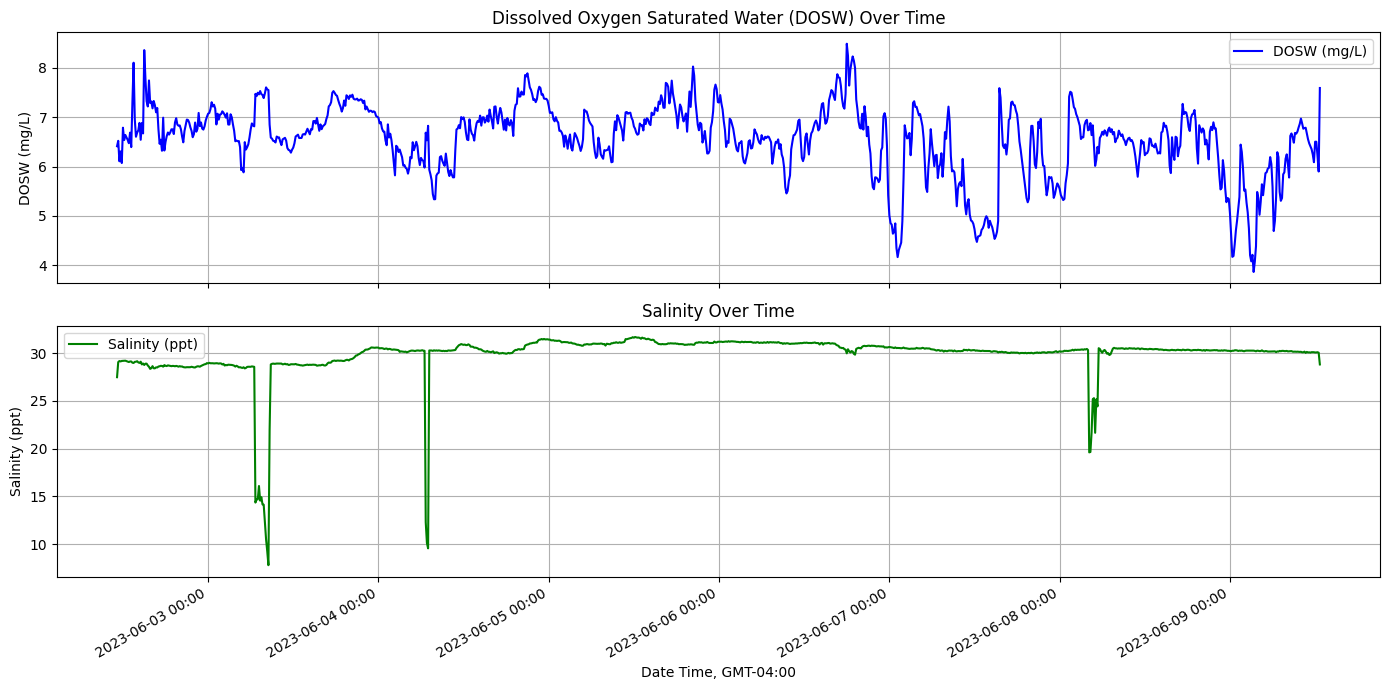

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure both DataFrames are sorted by date
do_data.sort_values(by='Date Time, GMT-04:00', inplace=True)
con_data.sort_values(by='Date Time, GMT-04:00', inplace=True)

# Plotting DOSW over time
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(do_data['Date Time, GMT-04:00'], do_data['DOSW'], label='DOSW (mg/L)', color='blue')
plt.title('Dissolved Oxygen Saturated Water (DOSW) Over Time')
plt.xlabel('Date Time, GMT-04:00')
plt.ylabel('DOSW (mg/L)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotation

# Plotting Salinity over time
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(con_data['Date Time, GMT-04:00'], con_data['Adjusted Salinity (ppt)'], label='Salinity (ppt)', color='green')
plt.title('Salinity Over Time')
plt.xlabel('Date Time, GMT-04:00')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.tight_layout()
plt.show()

In [61]:
# Plot Ideas
# Raw data vs Calibrated Data
# DO and Salinity over time

# Knit data together? and have plots for


# Filters of suspect data
# if DO is <0.5 mg/L for more than an hour, that data is suspect and needs to have a fouling flag
# location specific salinty flags for different sites, e.g. 5-18 ppt or 25-30 ppt